### Petrol Altın ve Gümüş 

Petrol Fiyatları:
             açılış   yüksek   düşük  kapanış
tarih                                       
2024-08-01   99.55  101.130   98.73   100.93
2024-08-02  102.00  103.350  100.68   102.81
2024-08-05  102.99  104.150   99.95   100.97
2024-08-06  101.29  103.600  101.15   102.66
2024-08-07  102.74  104.025  102.24   102.43


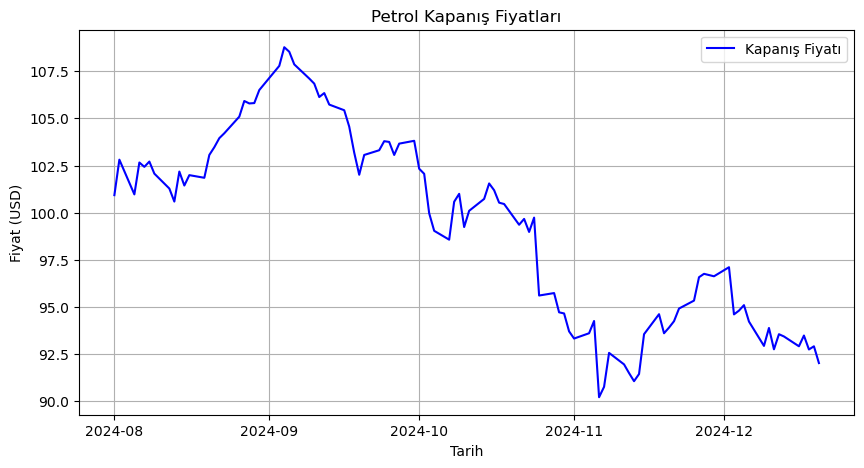

ValueError: I/O operation on closed file.

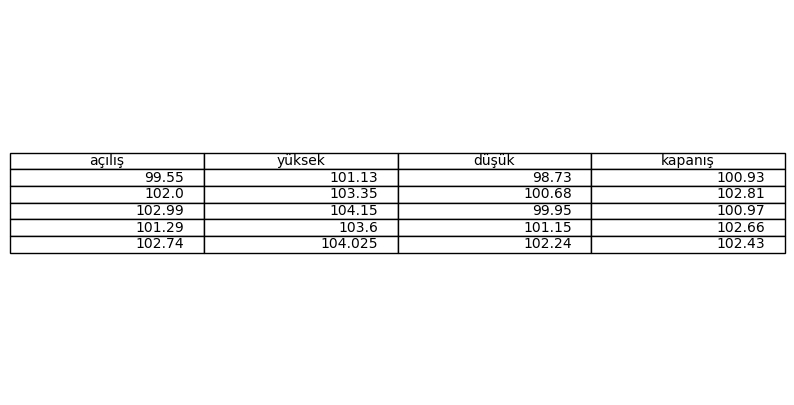

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import io
from PIL import Image

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key, weather_key):
        self.alpha_key = alpha_key
        self.weather_key = weather_key

    # 1. Petrol Fiyatlarını Alpha Vantage'dan Çekme
    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        # API'den gelen yanıtı kontrol et
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        # Verileri düzenleme
        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'açılış': float(price_data['1. open']),
                'yüksek': float(price_data['2. high']),
                'düşük': float(price_data['3. low']),
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

    # 2. Hava Durumu Verilerini OpenWeather'dan Çekme (New York için)
    def get_weather_data(self, city='New York'):
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={self.weather_key}&units=metric'
        response = requests.get(url)
        weather_data = response.json()
        
        if response.status_code != 200:
            print("Hava durumu verisi bulunamadı:", weather_data)
            return None

        result = {
            'şehir': weather_data['name'],
            'sıcaklık': weather_data['main']['temp'],
            'nem': weather_data['main']['humidity'],
            'basınç': weather_data['main']['pressure'],
            'hava durumu': weather_data['weather'][0]['description'],
        }
        return result

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA, API_KEY_WEATHER)

# Petrol fiyatlarını al
petrol_prices = veri.get_petrol_prices()
if petrol_prices is not None:
    print("Petrol Fiyatları:\n", petrol_prices.head())

    # Petrol fiyatlarını grafikle göster
    plt.figure(figsize=(10, 5))
    plt.plot(petrol_prices.index, petrol_prices['kapanış'], label='Kapanış Fiyatı', color='blue')
    plt.title('Petrol Kapanış Fiyatları')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.legend()
    plt.grid()
    plt.show()    

    # Petrol fiyatlarının tablosunu görsel olarak gösterme
    fig, ax = plt.subplots(figsize=(10, 5))  # Görüntü boyutu
    ax.axis('tight')  # Gereksiz boşlukları kaldır
    ax.axis('off')  # Çerçeveyi kaldır
    ax.table(
        cellText=petrol_prices.head().values,  # DataFrame verileri
        colLabels=petrol_prices.columns,      # Sütun adları
        loc='center'                          # Ortada konumlandır
    )

    # Görüntüyü bellekte tutmak için bir buffer kullan
    buf = io.BytesIO()
    plt.savefig(buf, format='png')  # Görseli buffer'a kaydet
    buf.seek(0)  # Buffer'ı başa sar

    # Buffer'dan bir Pillow Image nesnesi oluştur
    img = Image.open(buf)
    buf.close()

    # Görüntüyü ekranda göstermek isterseniz:
    img.show()

    # Artık img değişkeni bir Pillow Image nesnesidir
    print("Image formatına dönüştürüldü!")

# Hava durumu verilerini al (New York için)
weather_data = veri.get_weather_data('New York')
if weather_data is not None:
    print("\nNew York Hava Durumu:\n", weather_data)

# Temel istatistikleri al
print("\nPetrol Fiyatlarının Temel İstatistikleri:")
print(petrol_prices.describe())

In [6]:
class EmtiaVerisi:
    def __init__(self, alpha_key, weather_key):
        self.alpha_key = alpha_key
        self.weather_key = weather_key

    # Diğer metodlar burada...

    # 3. Altın Fiyatlarını Alpha Vantage'dan Çekme
    def get_gold_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GOLD&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Altın fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'kapanış': float(price_data['4. close']),
            })

        df_gold_prices = pd.DataFrame(prices)
        df_gold_prices['tarih'] = pd.to_datetime(df_gold_prices['tarih'])
        df_gold_prices = df_gold_prices.set_index('tarih').sort_index()
        return df_gold_prices

    # 4. Gümüş Fiyatlarını Alpha Vantage'dan Çekme
    def get_silver_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SLV&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Gümüş fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'kapanış': float(price_data['4. close']),
            })

        df_silver_prices = pd.DataFrame(prices)
        df_silver_prices['tarih'] = pd.to_datetime(df_silver_prices['tarih'])
        df_silver_prices = df_silver_prices.set_index('tarih').sort_index()
        return df_silver_prices

Petrol Fiyatları:
             açılış  yüksek    düşük  kapanış
tarih                                       
2024-06-13   93.66   94.90  93.3800    94.76
2024-06-14   94.50   94.72  93.8300    94.62
2024-06-17   94.53   96.08  94.0878    95.95
2024-06-18   95.72   97.08  95.6800    97.01
2024-06-20   96.79   97.41  96.2524    96.95

Altın Fiyatları:
             kapanış
tarih              
2024-06-13    16.07
2024-06-14    16.03
2024-06-17    16.14
2024-06-18    16.41
2024-06-20    16.96

Gümüş Fiyatları:
             kapanış
tarih              
2024-06-13    26.43
2024-06-14    27.01
2024-06-17    26.92
2024-06-18    26.96
2024-06-20    28.00


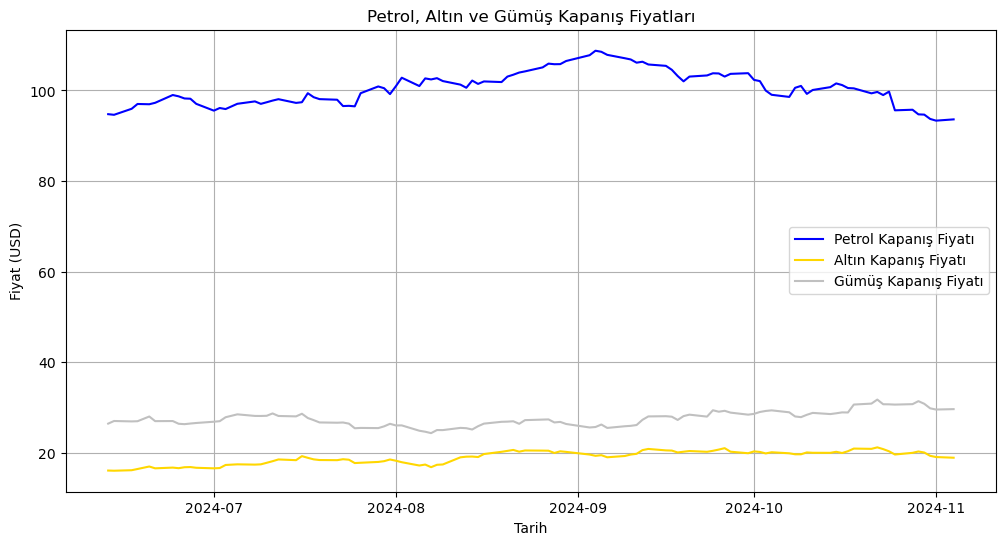

Tahmin Hatası (MSE): 14.07


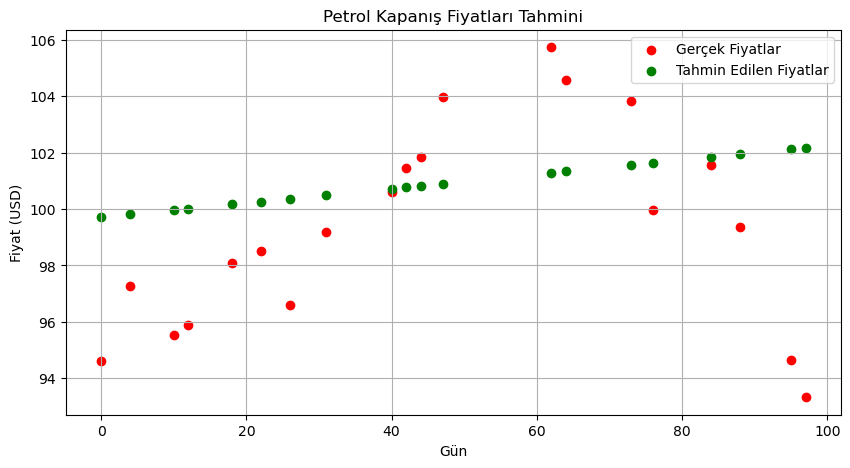

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key, weather_key):
        self.alpha_key = alpha_key
        self.weather_key = weather_key

    # 1. Petrol Fiyatlarını Alpha Vantage'dan Çekme
    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        # API'den gelen yanıtı kontrol et
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        # Verileri düzenleme
        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'açılış': float(price_data['1. open']),
                'yüksek': float(price_data['2. high']),
                'düşük': float(price_data['3. low']),
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

    # 2. Altın Fiyatlarını Alpha Vantage'dan Çekme
    def get_gold_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GOLD&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Altın fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'kapanış': float(price_data['4. close']),
            })

        df_gold_prices = pd.DataFrame(prices)
        df_gold_prices['tarih'] = pd.to_datetime(df_gold_prices['tarih'])
        df_gold_prices = df_gold_prices.set_index('tarih').sort_index()
        return df_gold_prices

    # 3. Gümüş Fiyatlarını Alpha Vantage'dan Çekme
    def get_silver_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SLV&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Gümüş fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'kapanış': float(price_data['4. close']),
            })

        df_silver_prices = pd.DataFrame(prices)
        df_silver_prices['tarih'] = pd.to_datetime(df_silver_prices['tarih'])
        df_silver_prices = df_silver_prices.set_index('tarih').sort_index()
        return df_silver_prices

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA, API_KEY_WEATHER)

# Petrol fiyatlarını al
petrol_prices = veri.get_petrol_prices()
gold_prices = veri.get_gold_prices()
silver_prices = veri.get_silver_prices()

if petrol_prices is not None:
    print("Petrol Fiyatları:\n", petrol_prices.head())

if gold_prices is not None:
    print("\nAltın Fiyatları:\n", gold_prices.head())

if silver_prices is not None:
    print("\nGümüş Fiyatları:\n", silver_prices.head())

# Petrol, altın ve gümüş fiyatlarını grafikle göster
if petrol_prices is not None and gold_prices is not None and silver_prices is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(petrol_prices.index, petrol_prices['kapanış'], label='Petrol Kapanış Fiyatı', color='blue')
    plt.plot(gold_prices.index, gold_prices['kapanış'], label='Altın Kapanış Fiyatı', color='gold')
    plt.plot(silver_prices.index, silver_prices['kapanış'], label='Gümüş Kapanış Fiyatı', color='silver')
    plt.title('Petrol, Altın ve Gümüş Kapanış Fiyatları')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.legend()
    plt.grid()
    plt.show()

# Petrol fiyatları ile tahmin modelini oluşturma
if petrol_prices is not None:
    petrol_prices['yüzde_değişim'] = petrol_prices['kapanış'].pct_change() * 100
    petrol_prices.dropna(inplace=True)  # NaN değerleri at

    # Özellikler ve hedef değişken
    X = np.array(range(len(petrol_prices))).reshape(-1, 1)  # Gün sayısı
    y = petrol_prices['kapanış'].values

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model oluşturma ve eğitme
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Tahmin yapma
    y_pred = model.predict(X_test)

    # Hata ölçümü
    mse = mean_squared_error(y_test, y_pred)
    print(f'Tahmin Hatası (MSE): {mse:.2f}')

    # Sonuçları görselleştirme
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test, y_test, color='red', label='Gerçek Fiyatlar')
    plt.scatter(X_test, y_pred, color='green', label='Tahmin Edilen Fiyatlar')
    plt.title('Petrol Kapanış Fiyatları Tahmini')
    plt.xlabel('Gün')
    plt.ylabel('Fiyat (USD)')
    plt.legend()
    plt.grid()
    plt.show()

Veriler petrol_fiyatları.csv dosyasına kaydedildi.
Veriler altın_fiyatları.csv dosyasına kaydedildi.
Veriler gümüş_fiyatları.csv dosyasına kaydedildi.


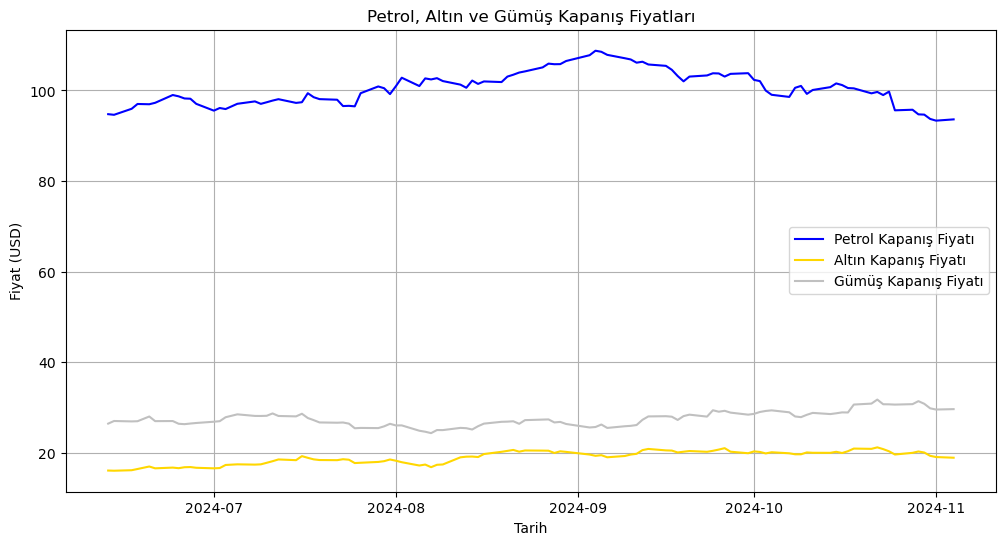

Tahmin Hatası (MSE): 14.07


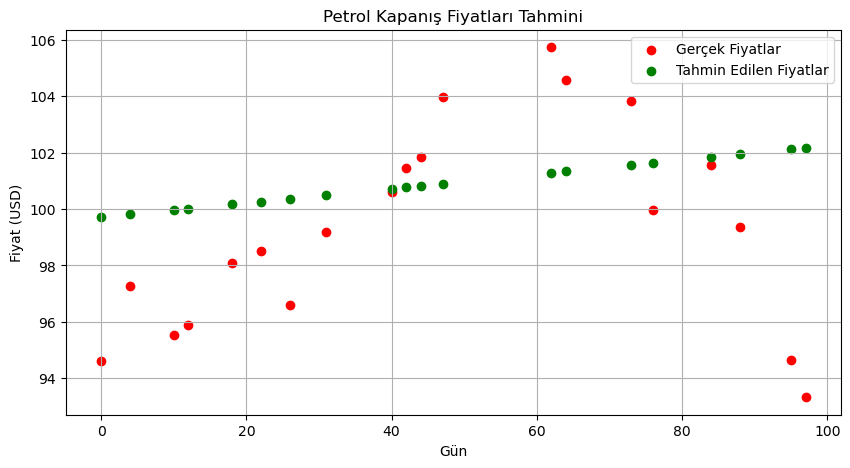

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key, weather_key):
        self.alpha_key = alpha_key
        self.weather_key = weather_key

    # Petrol Fiyatlarını Alpha Vantage'dan Çekme
    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'açılış': float(price_data['1. open']),
                'yüksek': float(price_data['2. high']),
                'düşük': float(price_data['3. low']),
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

    # Altın Fiyatlarını Alpha Vantage'dan Çekme
    def get_gold_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GOLD&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Altın fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'kapanış': float(price_data['4. close']),
            })

        df_gold_prices = pd.DataFrame(prices)
        df_gold_prices['tarih'] = pd.to_datetime(df_gold_prices['tarih'])
        df_gold_prices = df_gold_prices.set_index('tarih').sort_index()
        return df_gold_prices

    # Gümüş Fiyatlarını Alpha Vantage'dan Çekme
    def get_silver_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SLV&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Gümüş fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'kapanış': float(price_data['4. close']),
            })

        df_silver_prices = pd.DataFrame(prices)
        df_silver_prices['tarih'] = pd.to_datetime(df_silver_prices['tarih'])
        df_silver_prices = df_silver_prices.set_index('tarih').sort_index()
        return df_silver_prices

    # Fiyat verilerini CSV dosyasına kaydetme
    def save_to_csv(self, df, filename):
        df.to_csv(filename)
        print(f"Veriler {filename} dosyasına kaydedildi.")

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA, API_KEY_WEATHER)

# Petrol, altın ve gümüş fiyatlarını al
petrol_prices = veri.get_petrol_prices()
gold_prices = veri.get_gold_prices()
silver_prices = veri.get_silver_prices()

# Verileri CSV dosyasına kaydet
if petrol_prices is not None:
    veri.save_to_csv(petrol_prices, 'petrol_fiyatları.csv')

if gold_prices is not None:
    veri.save_to_csv(gold_prices, 'altın_fiyatları.csv')

if silver_prices is not None:
    veri.save_to_csv(silver_prices, 'gümüş_fiyatları.csv')

# Petrol, altın ve gümüş fiyatlarını grafikle göster
if petrol_prices is not None and gold_prices is not None and silver_prices is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(petrol_prices.index, petrol_prices['kapanış'], label='Petrol Kapanış Fiyatı', color='blue')
    plt.plot(gold_prices.index, gold_prices['kapanış'], label='Altın Kapanış Fiyatı', color='gold')
    plt.plot(silver_prices.index, silver_prices['kapanış'], label='Gümüş Kapanış Fiyatı', color='silver')
    plt.title('Petrol, Altın ve Gümüş Kapanış Fiyatları')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.legend()
    plt.grid()
    plt.show()

# Petrol fiyatları ile tahmin modelini oluşturma
if petrol_prices is not None:
    petrol_prices['yüzde_değişim'] = petrol_prices['kapanış'].pct_change() * 100
    petrol_prices.dropna(inplace=True)  # NaN değerleri at

    # Özellikler ve hedef değişken
    X = np.array(range(len(petrol_prices))).reshape(-1, 1)  # Gün sayısı
    y = petrol_prices['kapanış'].values

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model oluşturma ve eğitme
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Tahmin yapma
    y_pred = model.predict(X_test)

    # Hata ölçümü
    mse = mean_squared_error(y_test, y_pred)
    print(f'Tahmin Hatası (MSE): {mse:.2f}')

    # Sonuçları görselleştirme
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test, y_test, color='red', label='Gerçek Fiyatlar')
    plt.scatter(X_test, y_pred, color='green', label='Tahmin Edilen Fiyatlar')
    plt.title('Petrol Kapanış Fiyatları Tahmini')
    plt.xlabel('Gün')
    plt.ylabel('Fiyat (USD)')
    plt.legend()
    plt.grid()
    plt.show()

Tahmin Hatası (MSE): 2.28


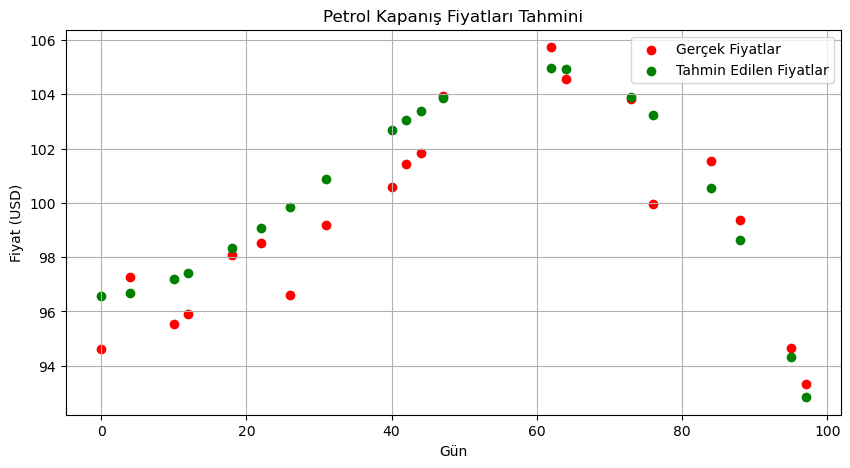

In [14]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key, weather_key):
        self.alpha_key = alpha_key
        self.weather_key = weather_key

    # Petrol Fiyatlarını Alpha Vantage'dan Çekme
    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'açılış': float(price_data['1. open']),
                'yüksek': float(price_data['2. high']),
                'düşük': float(price_data['3. low']),
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA, API_KEY_WEATHER)
petrol_prices = veri.get_petrol_prices()

# Petrol fiyatlarını kontrol et
if petrol_prices is not None:
    petrol_prices['yüzde_değişim'] = petrol_prices['kapanış'].pct_change() * 100
    petrol_prices.dropna(inplace=True)  # NaN değerleri at

    # Özellikler ve hedef değişken
    X = np.array(range(len(petrol_prices))).reshape(-1, 1)  # Gün sayısı
    y = petrol_prices['kapanış'].values

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Polinom model oluşturma
    degree = 3  # Polinom derecesi
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Tahmin yapma
    y_pred = model.predict(X_test)

    # Hata ölçümü
    mse = mean_squared_error(y_test, y_pred)
    print(f'Tahmin Hatası (MSE): {mse:.2f}')

    # Sonuçları görselleştirme
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test, y_test, color='red', label='Gerçek Fiyatlar')
    plt.scatter(X_test, y_pred, color='green', label='Tahmin Edilen Fiyatlar')
    plt.title('Petrol Kapanış Fiyatları Tahmini')
    plt.xlabel('Gün')
    plt.ylabel('Fiyat (USD)')
    plt.legend()
    plt.grid()
    plt.show()

Tahmin Hatası (MSE): 1.00
R² Skoru: 0.91


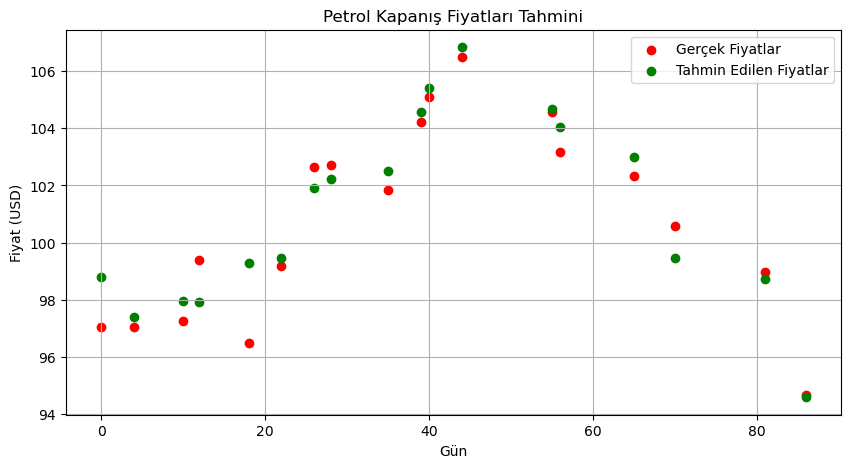


New York Hava Durumu:
 {'şehir': 'New York', 'sıcaklık': 11.74, 'nem': 90, 'basınç': 1024, 'hava durumu': 'mist'}


In [18]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key, weather_key):
        self.alpha_key = alpha_key
        self.weather_key = weather_key

    # Petrol Fiyatlarını Alpha Vantage'dan Çekme
    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'açılış': float(price_data['1. open']),
                'yüksek': float(price_data['2. high']),
                'düşük': float(price_data['3. low']),
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

    # Hava Durumu Verilerini OpenWeather'dan Çekme
    def get_weather_data(self, city='New York'):
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={self.weather_key}&units=metric'
        response = requests.get(url)
        weather_data = response.json()
        
        if response.status_code != 200:
            print("Hava durumu verisi bulunamadı:", weather_data)
            return None

        result = {
            'şehir': weather_data['name'],
            'sıcaklık': weather_data['main']['temp'],
            'nem': weather_data['main']['humidity'],
            'basınç': weather_data['main']['pressure'],
            'hava durumu': weather_data['weather'][0]['description'],
        }
        return result

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA, API_KEY_WEATHER)
petrol_prices = veri.get_petrol_prices()

# Petrol fiyatlarını kontrol et
if petrol_prices is not None:
    petrol_prices['yüzde_değişim'] = petrol_prices['kapanış'].pct_change() * 100
    petrol_prices.dropna(inplace=True)  # NaN değerleri at

    # Özellikler ve hedef değişken
    X = np.array(range(len(petrol_prices))).reshape(-1, 1)  # Gün sayısı
    y = petrol_prices['kapanış'].values

    # Hareketli ortalama ekleme
    petrol_prices['Hareketli Ortalama (5 Gün)'] = petrol_prices['kapanış'].rolling(window=5).mean()
    petrol_prices['Hareketli Ortalama (10 Gün)'] = petrol_prices['kapanış'].rolling(window=10).mean()

    # NaN değerleri temizle
    petrol_prices.dropna(inplace=True)

    # Özellikleri güncelle
    X = np.column_stack((np.array(range(len(petrol_prices))).reshape(-1, 1), 
                          petrol_prices['Hareketli Ortalama (5 Gün)'].values, 
                          petrol_prices['Hareketli Ortalama (10 Gün)'].values))

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y[len(y) - len(X):], test_size=0.2, random_state=42)

    # Polinom model oluşturma
    degree = 3  # Polinom derecesi
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Tahmin yapma
    y_pred = model.predict(X_test)

    # Hata ölçümü
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Tahmin Hatası (MSE): {mse:.2f}')
    print(f'R² Skoru: {r2:.2f}')

    # Sonuçları görselleştirme
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test[:, 0], y_test, color='red', label='Gerçek Fiyatlar')
    plt.scatter(X_test[:, 0], y_pred, color='green', label='Tahmin Edilen Fiyatlar')
    plt.title('Petrol Kapanış Fiyatları Tahmini')
    plt.xlabel('Gün')
    plt.ylabel('Fiyat (USD)')
    plt.legend()
    plt.grid()
    plt.show()

    # Hava durumu verilerini al
    weather_data = veri.get_weather_data('New York')
    if weather_data is not None:
        print("\nNew York Hava Durumu:\n", weather_data)

In [23]:
from sklearn.model_selection import GridSearchCV

# Hiperparametreler için bir grid tanımlayın
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV kullanarak en iyi parametreleri bul
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5 katlamalı çapraz doğrulama
                           n_jobs=-1,  # Tüm çekirdekleri kullan
                           verbose=2)

grid_search.fit(X_train, y_train)

# En iyi parametreleri ve skoru göster
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi modelin R² skoru:", grid_search.best_score_)

# En iyi model ile tahmin yapma
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Yeni tahmin hatasını hesaplayın
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Tahmin Hatası (MSE): {mse_best:.2f}')
print(f'R² Skoru: {r2_best:.2f}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
En iyi modelin R² skoru: 0.8953516836098885
Tahmin Hatası (MSE): 1.18
R² Skoru: 0.88


Epoch 1/100


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3364  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2125
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0304
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0324
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0371
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0304
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0215
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0235
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0187
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0235
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0175
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0256
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0189 
Epoch 16/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

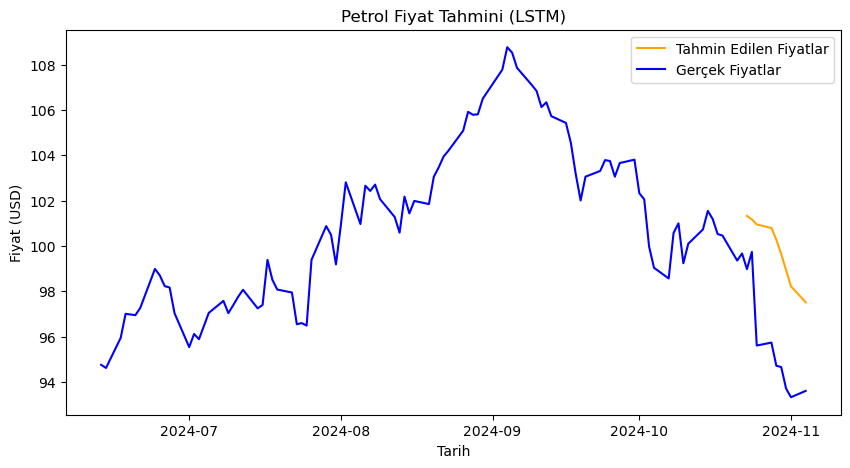

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Petrol fiyat verisini al
petrol_prices = veri.get_petrol_prices()

# Veriyi normalleştirme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(petrol_prices['kapanış'].values.reshape(-1, 1))

# Eğitim ve test verilerini oluşturma
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Zaman serisi için veri seti oluşturma
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10  # Girdi zaman adımı
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Giriş verisini yeniden şekillendirme
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM modeli oluşturma
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Aşırı öğrenmeyi önlemek için Dropout katmanı
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Çıkış katmanı

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Tahmin yapma
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Normalizasyonu geri al

# Sonuçları görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(petrol_prices.index[train_size + time_step + 1:], predicted_prices, label='Tahmin Edilen Fiyatlar', color='orange')
plt.plot(petrol_prices.index, petrol_prices['kapanış'], label='Gerçek Fiyatlar', color='blue')
plt.title('Petrol Fiyat Tahmini (LSTM)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()

In [27]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0095 - val_loss: 0.0160
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0161 - val_loss: 0.0150
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0114 - val_loss: 0.0153
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122 - val_loss: 0.0172
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0100 - val_loss: 0.0187
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0117 - val_loss: 0.0182
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0111 - val_loss: 0.0177
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 - val_loss: 0.0183
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0088 - val_loss: 0.0198
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 - val_loss: 0.0201
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - val_loss: 0.0197
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - val_loss:

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R²: {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE: 0.23807796182560084, R²: -1.3456701383706076


In [31]:
from keras.layers import GRU

model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


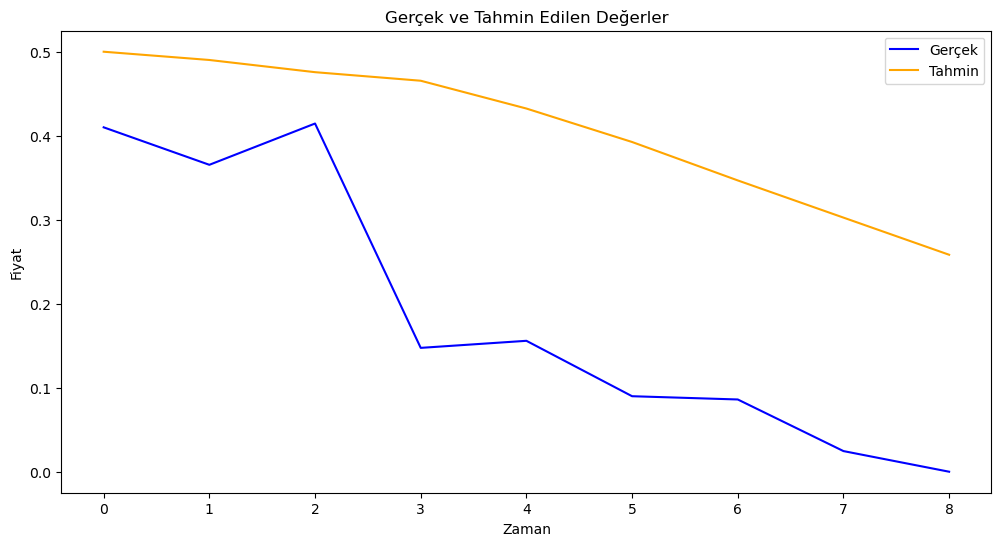

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek', color='blue')
plt.plot(y_pred, label='Tahmin', color='orange')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

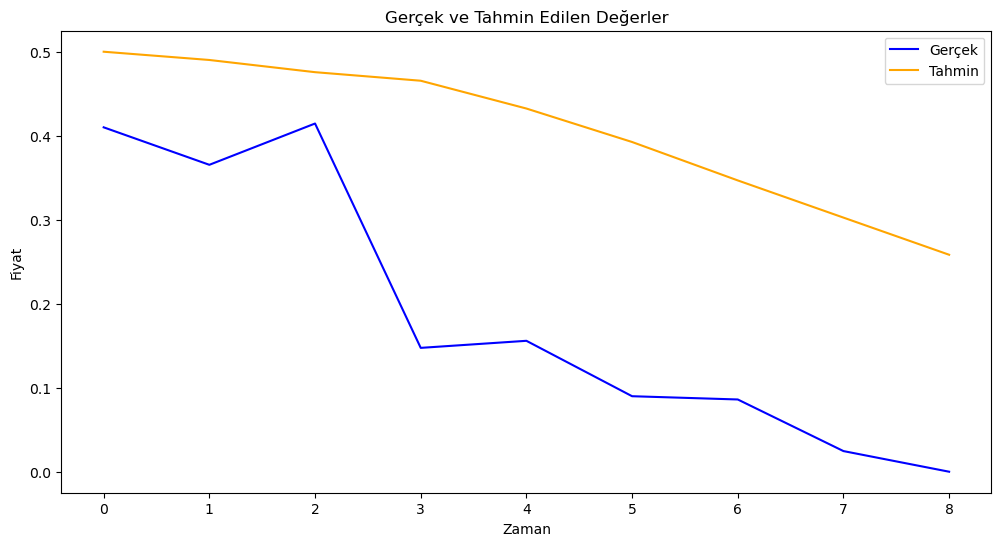

In [35]:
# Tahmin dizisini gerçek zaman dizisine göre kaydırma
shift = len(X_test) - len(y_pred)
if shift > 0:
    y_pred_shifted = np.concatenate([np.full(shift, np.nan), y_pred])
else:
    y_pred_shifted = y_pred[-shift:]

# Gerçek değerler ile tahmin edilen değerleri çizme
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek', color='blue')
plt.plot(y_pred_shifted, label='Tahmin', color='orange')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

Epoch 1/100


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3541  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2492
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1438
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0508
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0691
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0480
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0233
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0232
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0299
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0219
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0193
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0273
Epoch 16/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

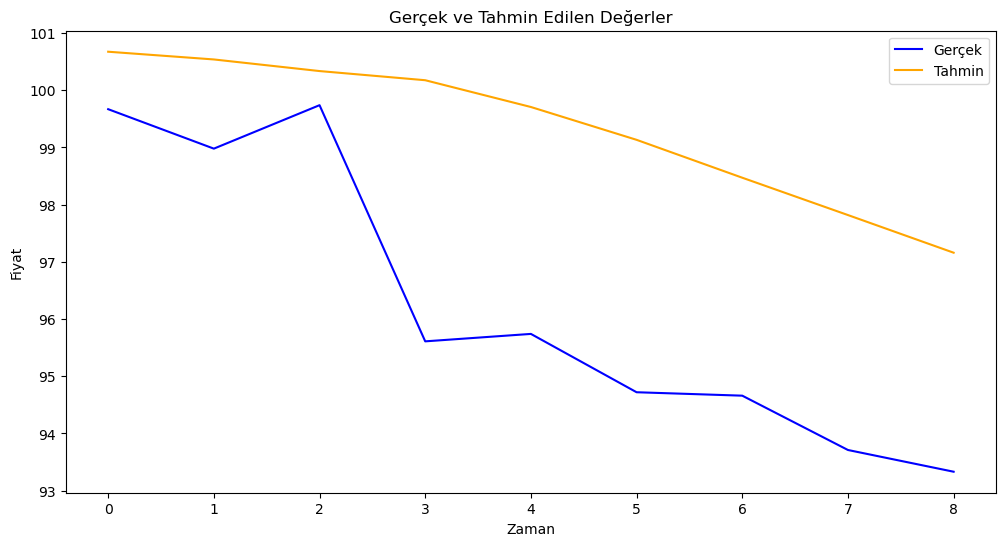

In [37]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key):
        self.alpha_key = alpha_key

    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA)
petrol_prices = veri.get_petrol_prices()

# Veriyi ölçeklendirme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(petrol_prices['kapanış'].values.reshape(-1, 1))

# Eğitim ve test setlerine ayırma
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Veri setini oluşturma
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Zaman adımını ayarla
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Veriyi yeniden şekillendirme
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM Modeli oluşturma
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Tahmin yapma
y_pred = model.predict(X_test)

# Gerçek değerleri yeniden ölçeklendir
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Gerçek ve tahmin edilen değerleri çizme
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek', color='blue')
plt.plot(y_pred, label='Tahmin', color='orange')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

Epoch 1/100


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.2921 - val_loss: 0.0236
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1654 - val_loss: 0.0228
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674 - val_loss: 0.0726
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - val_loss: 0.1747
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0563 - val_loss: 0.1726
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - val_loss: 0.1154
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - val_loss: 0.0707
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - val_loss: 0.0525
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - val_loss: 0.0510
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0261 - val_loss: 0.0598
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - val_loss: 0.0795
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - val_loss: 0.1009
1/1 ━━━━━━━━

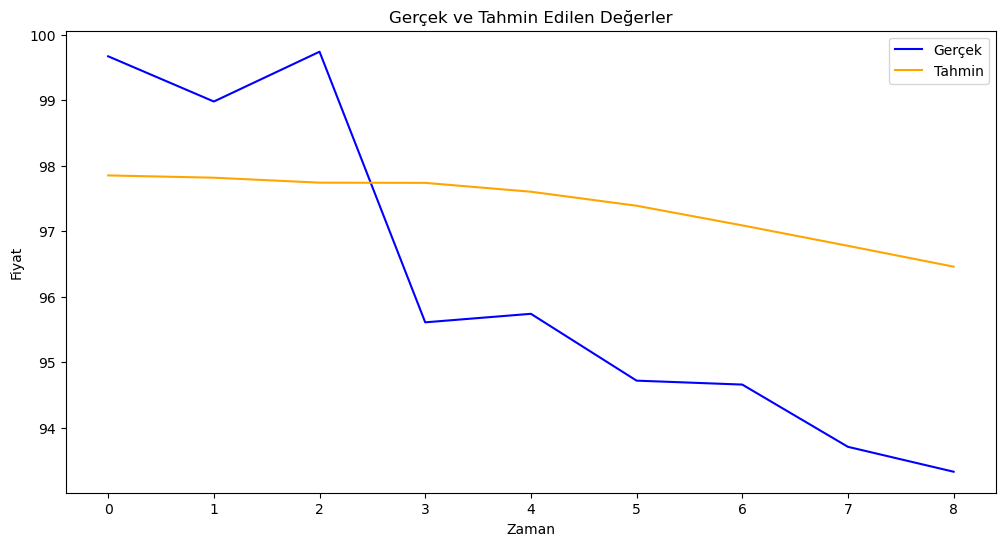

In [39]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key):
        self.alpha_key = alpha_key

    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA)
petrol_prices = veri.get_petrol_prices()

# Veriyi ölçeklendirme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(petrol_prices['kapanış'].values.reshape(-1, 1))

# Eğitim ve test setlerine ayırma
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Veri setini oluşturma
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Zaman adımını ayarla
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Veriyi yeniden şekillendirme
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM Modeli oluşturma
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Erken durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Tahmin yapma
y_pred = model.predict(X_test)

# Gerçek değerleri yeniden ölçeklendir
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Hata metrikleri
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Gerçek ve tahmin edilen değerleri çizme
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek', color='blue')
plt.plot(y_pred, label='Tahmin', color='orange')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

Epoch 1/100


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3371 - val_loss: 0.0309
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2136 - val_loss: 0.0199
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0975 - val_loss: 0.0417
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - val_loss: 0.1183
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0283 - val_loss: 0.1831
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0475 - val_loss: 0.1483
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - val_loss: 0.0981
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - val_loss: 0.0685
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - val_loss: 0.0578
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - val_loss: 0.0582
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - val_loss: 0.0675
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - val_loss: 0.0821
1/1 ━━━━━━━

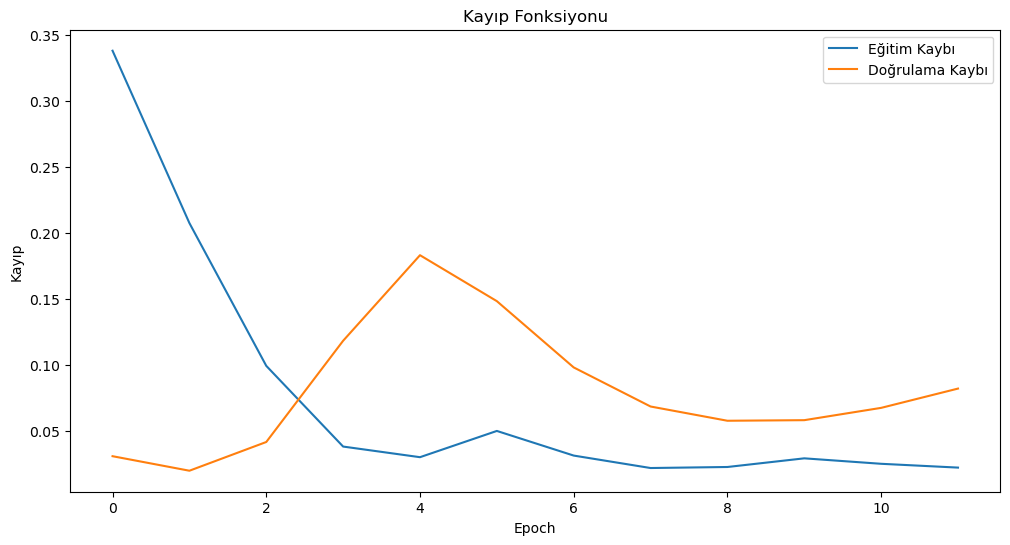

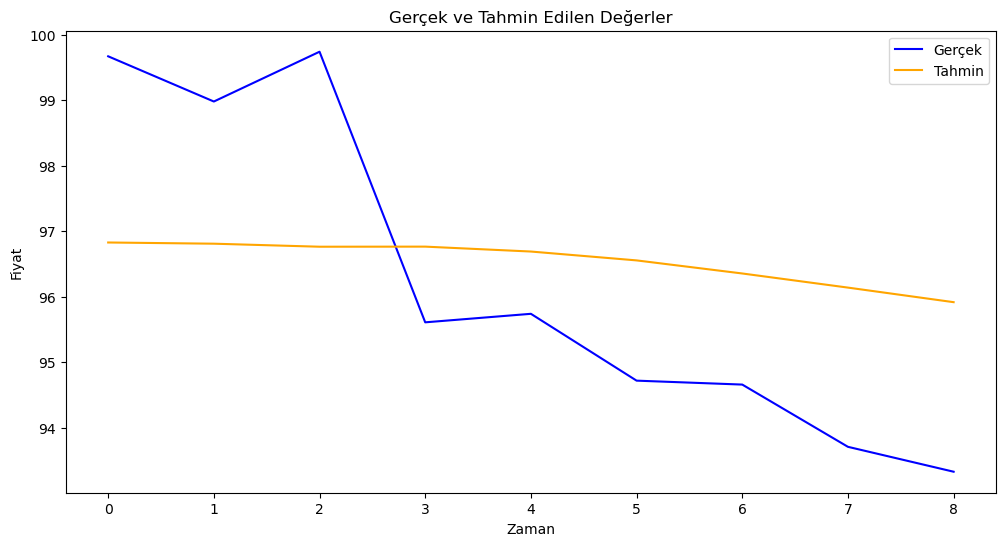

In [41]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key):
        self.alpha_key = alpha_key

    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA)
petrol_prices = veri.get_petrol_prices()

# Veriyi ölçeklendirme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(petrol_prices['kapanış'].values.reshape(-1, 1))

# Eğitim ve test setlerine ayırma
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Veri setini oluşturma
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Zaman adımını ayarla
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Veriyi yeniden şekillendirme
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM Modeli oluşturma
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Erken durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Tahmin yapma
y_pred = model.predict(X_test)

# Gerçek değerleri yeniden ölçeklendir
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Hata metrikleri
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Kayıp fonksiyonunu görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Fonksiyonu')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Gerçek ve tahmin edilen değerleri çizme
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek', color='blue')
plt.plot(y_pred, label='Tahmin', color='orange')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

Epoch 1/100


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2856 - val_loss: 0.0220
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1456 - val_loss: 0.0250
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0629 - val_loss: 0.0776
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - val_loss: 0.1744
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - val_loss: 0.1837
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - val_loss: 0.1254
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - val_loss: 0.0778
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - val_loss: 0.0554
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - val_loss: 0.0503
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - val_loss: 0.0553
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0257 - val_loss: 0.0693
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
RMSE: 2.288628970414292
MAE: 1.7767157660590287
       Tar

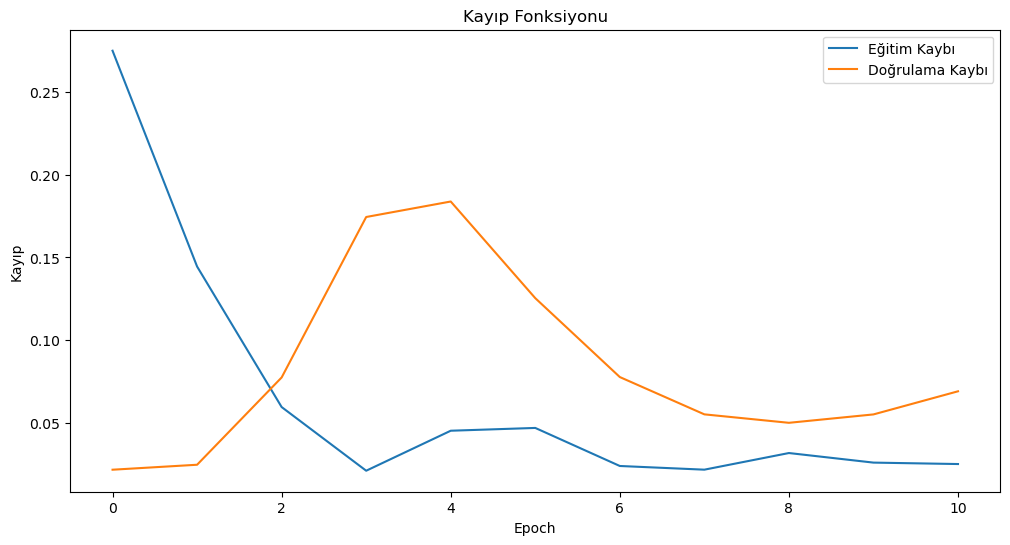

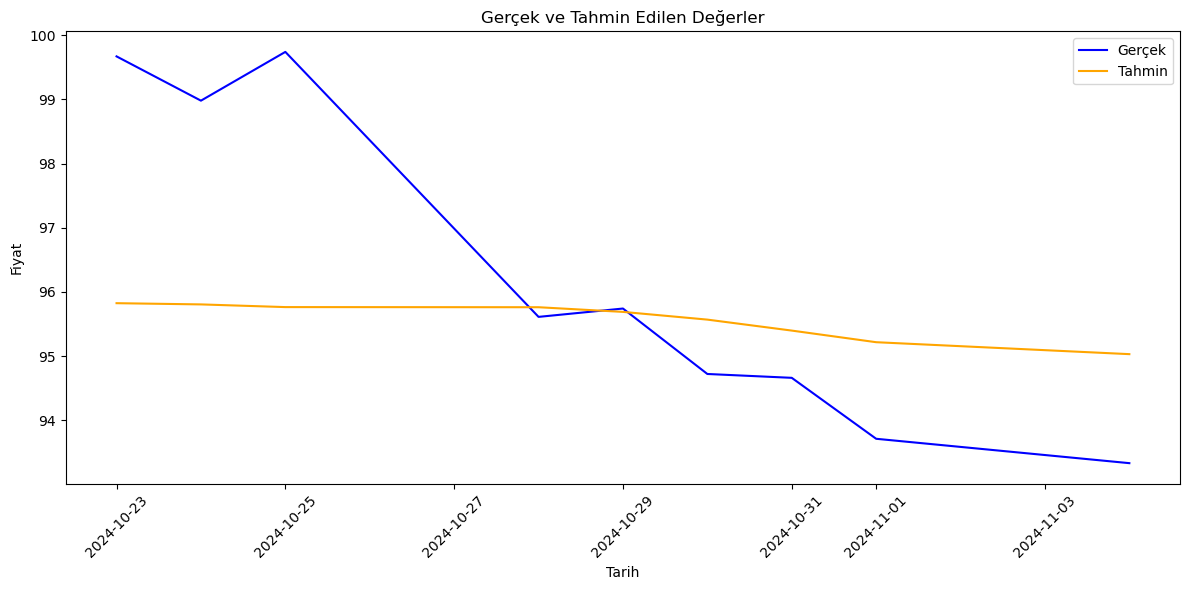

In [43]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key):
        self.alpha_key = alpha_key

    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA)
petrol_prices = veri.get_petrol_prices()

# Veriyi ölçeklendirme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(petrol_prices['kapanış'].values.reshape(-1, 1))

# Eğitim ve test setlerine ayırma
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Veri setini oluşturma
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Zaman adımını ayarla
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Veriyi yeniden şekillendirme
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM Modeli oluşturma
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Erken durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Tahmin yapma
y_pred = model.predict(X_test)

# Gerçek değerleri yeniden ölçeklendir
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Hata metrikleri
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Gerçek ve tahmin edilen değerler ile tarihleri içeren DataFrame oluşturma
predicted_dates = petrol_prices.index[-len(y_test):].to_list()
results_df = pd.DataFrame({
    'Tarih': predicted_dates,
    'Gerçek Fiyat': y_test.flatten(),
    'Tahmin Fiyat': y_pred.flatten()
})

# Sonuç tablosunu yazdırma
print(results_df)

# Kayıp fonksiyonunu görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Fonksiyonu')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Gerçek ve tahmin edilen değerleri çizme
plt.figure(figsize=(12, 6))
plt.plot(results_df['Tarih'], results_df['Gerçek Fiyat'], label='Gerçek', color='blue')
plt.plot(results_df['Tarih'], results_df['Tahmin Fiyat'], label='Tahmin', color='orange')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Epoch 1/100


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3676 - val_loss: 0.0358
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2597 - val_loss: 0.0206
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1304 - val_loss: 0.0317
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0578 - val_loss: 0.0985
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - val_loss: 0.2011
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - val_loss: 0.1871
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0411 - val_loss: 0.1278
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - val_loss: 0.0847
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - val_loss: 0.0624
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - val_loss: 0.0586
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - val_loss: 0.0659
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 - val_loss: 0.0793
1/1 ━━━━━━━

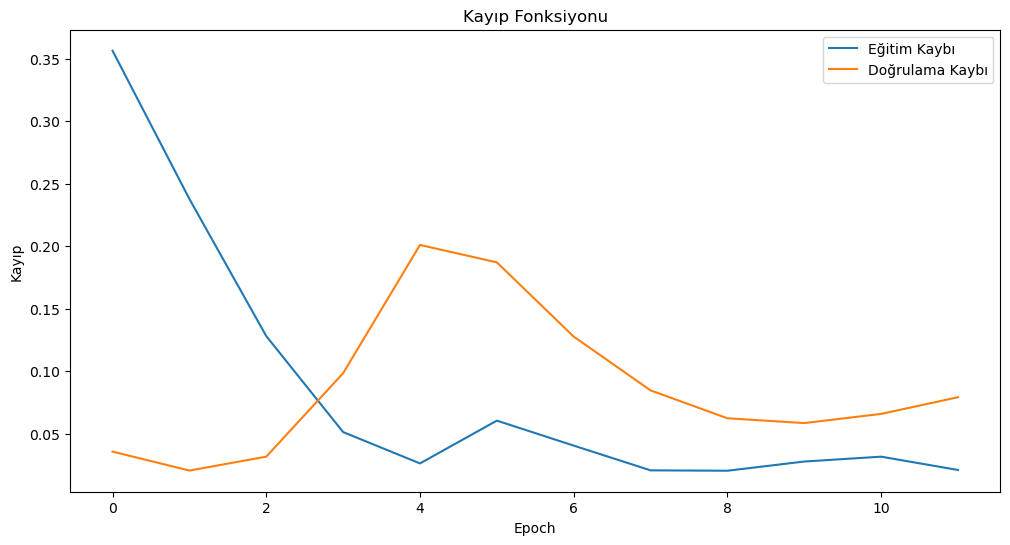

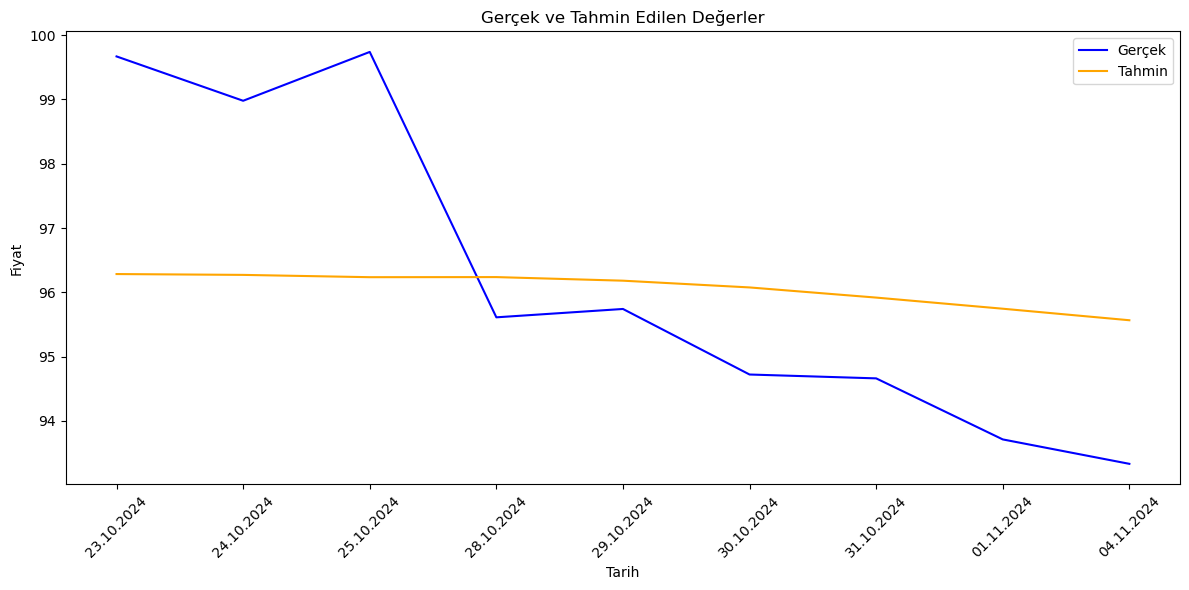

In [45]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key):
        self.alpha_key = alpha_key

    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA)
petrol_prices = veri.get_petrol_prices()

# Veriyi ölçeklendirme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(petrol_prices['kapanış'].values.reshape(-1, 1))

# Eğitim ve test setlerine ayırma
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Veri setini oluşturma
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Zaman adımını ayarla
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Veriyi yeniden şekillendirme
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM Modeli oluşturma
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Erken durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Tahmin yapma
y_pred = model.predict(X_test)

# Gerçek değerleri yeniden ölçeklendir
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Hata metrikleri
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Gerçek ve tahmin edilen değerler ile tarihleri içeren DataFrame oluşturma
predicted_dates = petrol_prices.index[-len(y_test):].to_list()
formatted_dates = [date.strftime('%d.%m.%Y') for date in predicted_dates]

results_df = pd.DataFrame({
    'Tarih': formatted_dates,
    'Gerçek Fiyat': y_test.flatten(),
    'Tahmin Fiyat': y_pred.flatten()
})

# Sonuç tablosunu yazdırma
print(results_df)

# Kayıp fonksiyonunu görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Fonksiyonu')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Gerçek ve tahmin edilen değerleri çizme
plt.figure(figsize=(12, 6))
plt.plot(results_df['Tarih'], results_df['Gerçek Fiyat'], label='Gerçek', color='blue')
plt.plot(results_df['Tarih'], results_df['Tahmin Fiyat'], label='Tahmin', color='orange')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tahmin Hatası (MSE): 1.00
R² Skoru: 0.91


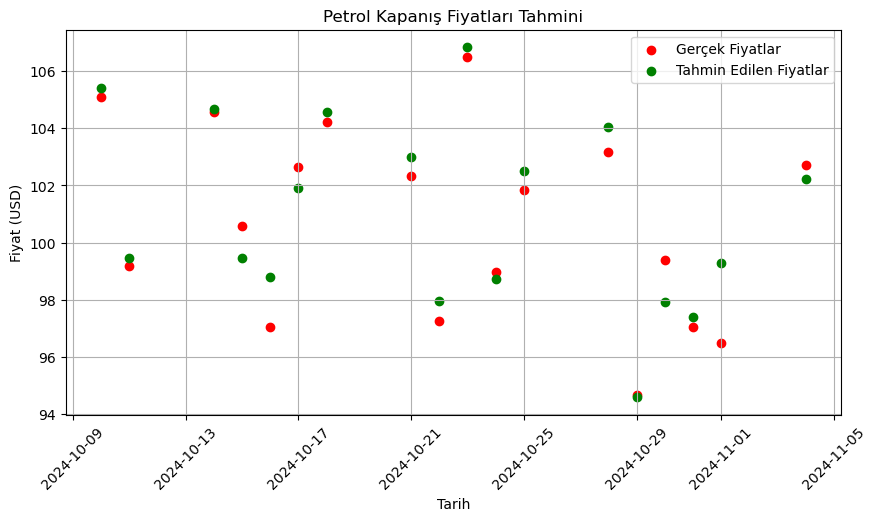


New York Hava Durumu:
 {'şehir': 'New York', 'sıcaklık': 12.22, 'nem': 90, 'basınç': 1025, 'hava durumu': 'mist'}


In [47]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key, weather_key):
        self.alpha_key = alpha_key
        self.weather_key = weather_key

    # Petrol Fiyatlarını Alpha Vantage'dan Çekme
    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'açılış': float(price_data['1. open']),
                'yüksek': float(price_data['2. high']),
                'düşük': float(price_data['3. low']),
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

    # Hava Durumu Verilerini OpenWeather'dan Çekme
    def get_weather_data(self, city='New York'):
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={self.weather_key}&units=metric'
        response = requests.get(url)
        weather_data = response.json()
        
        if response.status_code != 200:
            print("Hava durumu verisi bulunamadı:", weather_data)
            return None

        result = {
            'şehir': weather_data['name'],
            'sıcaklık': weather_data['main']['temp'],
            'nem': weather_data['main']['humidity'],
            'basınç': weather_data['main']['pressure'],
            'hava durumu': weather_data['weather'][0]['description'],
        }
        return result

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA, API_KEY_WEATHER)
petrol_prices = veri.get_petrol_prices()

# Petrol fiyatlarını kontrol et
if petrol_prices is not None:
    petrol_prices['yüzde_değişim'] = petrol_prices['kapanış'].pct_change() * 100
    petrol_prices.dropna(inplace=True)  # NaN değerleri at

    # Özellikler ve hedef değişken
    X = np.array(range(len(petrol_prices))).reshape(-1, 1)  # Gün sayısı
    y = petrol_prices['kapanış'].values

    # Hareketli ortalama ekleme
    petrol_prices['Hareketli Ortalama (5 Gün)'] = petrol_prices['kapanış'].rolling(window=5).mean()
    petrol_prices['Hareketli Ortalama (10 Gün)'] = petrol_prices['kapanış'].rolling(window=10).mean()

    # NaN değerleri temizle
    petrol_prices.dropna(inplace=True)

    # Özellikleri güncelle
    X = np.column_stack((np.array(range(len(petrol_prices))).reshape(-1, 1), 
                          petrol_prices['Hareketli Ortalama (5 Gün)'].values, 
                          petrol_prices['Hareketli Ortalama (10 Gün)'].values))

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y[len(y) - len(X):], test_size=0.2, random_state=42)

    # Polinom model oluşturma
    degree = 3  # Polinom derecesi
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Tahmin yapma
    y_pred = model.predict(X_test)

    # Hata ölçümü
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Tahmin Hatası (MSE): {mse:.2f}')
    print(f'R² Skoru: {r2:.2f}')

    # Tahmin tarihlerini elde etme
    test_dates = petrol_prices.index[-len(y_test):]

    # Sonuçları görselleştirme
    plt.figure(figsize=(10, 5))
    plt.scatter(test_dates, y_test, color='red', label='Gerçek Fiyatlar')
    plt.scatter(test_dates, y_pred, color='green', label='Tahmin Edilen Fiyatlar')
    plt.title('Petrol Kapanış Fiyatları Tahmini')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

    # Hava durumu verilerini al
    weather_data = veri.get_weather_data('New York')
    if weather_data is not None:
        print("\nNew York Hava Durumu:\n", weather_data)

### 5 Günlük Petrol Fiyat Tahmini

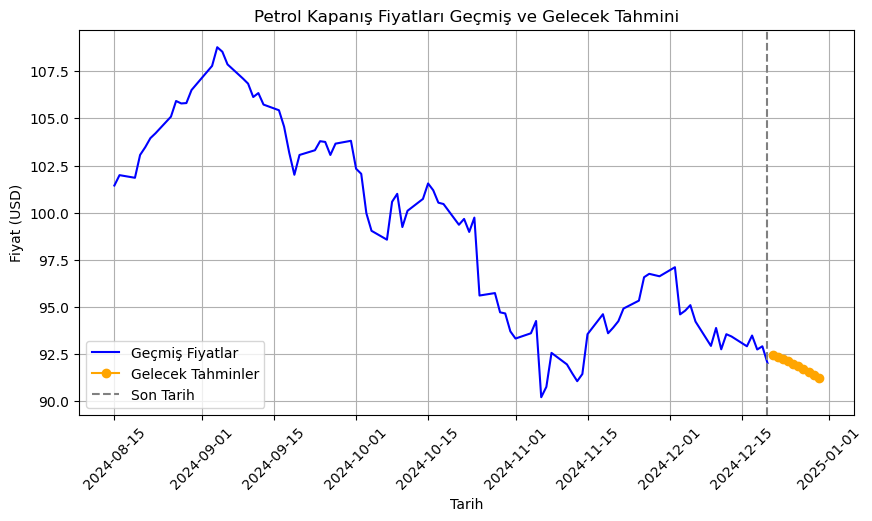


New York Hava Durumu:
 {'şehir': 'New York', 'sıcaklık': -10.31, 'nem': 64, 'basınç': 1037, 'hava durumu': 'clear sky'}


In [20]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from datetime import timedelta

# API anahtarlarını ekleyin
API_KEY_ALPHA = 'ZRBHQKIYIETVGULJ'  # Alpha Vantage API anahtarı
API_KEY_WEATHER = '8a0dbb8511cc188e62055ba49f7c5ba8'  # OpenWeather API anahtarı

class EmtiaVerisi:
    def __init__(self, alpha_key, weather_key):
        self.alpha_key = alpha_key
        self.weather_key = weather_key

    # Petrol Fiyatlarını Alpha Vantage'dan Çekme
    def get_petrol_prices(self):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CL&apikey={self.alpha_key}'
        response = requests.get(url)
        data = response.json()
        
        if 'Time Series (Daily)' not in data:
            print("Petrol fiyatları verisi bulunamadı:", data)
            return None

        timeseries = data['Time Series (Daily)']
        prices = []
        for date, price_data in timeseries.items():
            prices.append({
                'tarih': date,
                'açılış': float(price_data['1. open']),
                'yüksek': float(price_data['2. high']),
                'düşük': float(price_data['3. low']),
                'kapanış': float(price_data['4. close']),
            })

        df_prices = pd.DataFrame(prices)
        df_prices['tarih'] = pd.to_datetime(df_prices['tarih'])
        df_prices = df_prices.set_index('tarih').sort_index()
        return df_prices

    # Hava Durumu Verilerini OpenWeather'dan Çekme
    def get_weather_data(self, city='New York'):
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={self.weather_key}&units=metric'
        response = requests.get(url)
        weather_data = response.json()
        
        if response.status_code != 200:
            print("Hava durumu verisi bulunamadı:", weather_data)
            return None

        result = {
            'şehir': weather_data['name'],
            'sıcaklık': weather_data['main']['temp'],
            'nem': weather_data['main']['humidity'],
            'basınç': weather_data['main']['pressure'],
            'hava durumu': weather_data['weather'][0]['description'],
        }
        return result

# Emtia verilerini çek
veri = EmtiaVerisi(API_KEY_ALPHA, API_KEY_WEATHER)
petrol_prices = veri.get_petrol_prices()

# Petrol fiyatlarını kontrol et
if petrol_prices is not None:
    petrol_prices['yüzde_değişim'] = petrol_prices['kapanış'].pct_change() * 100
    petrol_prices.dropna(inplace=True)  # NaN değerleri at

    # Özellikler ve hedef değişken
    X = np.array(range(len(petrol_prices))).reshape(-1, 1)  # Gün sayısı
    y = petrol_prices['kapanış'].values

    # Hareketli ortalama ekleme
    petrol_prices['Hareketli Ortalama (5 Gün)'] = petrol_prices['kapanış'].rolling(window=5).mean()
    petrol_prices['Hareketli Ortalama (10 Gün)'] = petrol_prices['kapanış'].rolling(window=10).mean()

    # NaN değerleri temizle
    petrol_prices.dropna(inplace=True)

    # Özellikleri güncelle
    X = np.column_stack((np.array(range(len(petrol_prices))).reshape(-1, 1), 
                          petrol_prices['Hareketli Ortalama (5 Gün)'].values, 
                          petrol_prices['Hareketli Ortalama (10 Gün)'].values))

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y[len(y) - len(X):], test_size=0.2, random_state=42)

    # Polinom model oluşturma
    degree = 3  # Polinom derecesi
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Gelecek tarihler için tahmin yapma
    future_days = 10  # Gelecek gün sayısı
    last_day_index = len(petrol_prices)
    future_dates = [petrol_prices.index[-1] + timedelta(days=i) for i in range(1, future_days + 1)]
    
    # Gelecek gün sayısı için X değerleri oluştur
    future_X = np.array(range(last_day_index, last_day_index + future_days)).reshape(-1, 1)

    # Hareketli ortalamaları hesapla
    last_5_avg = petrol_prices['Hareketli Ortalama (5 Gün)'].iloc[-1]
    last_10_avg = petrol_prices['Hareketli Ortalama (10 Gün)'].iloc[-1]
    future_X = np.column_stack((future_X, np.repeat(last_5_avg, future_days), np.repeat(last_10_avg, future_days)))

    # Gelecek tahminlerini yap
    future_predictions = model.predict(future_X)

    # Sonuçları görselleştirme
    plt.figure(figsize=(10, 5))
    plt.plot(petrol_prices.index, petrol_prices['kapanış'], color='blue', label='Geçmiş Fiyatlar')
    plt.plot(future_dates, future_predictions, color='orange', marker='o', label='Gelecek Tahminler')
    plt.title('Petrol Kapanış Fiyatları Geçmiş ve Gelecek Tahmini')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.axvline(x=petrol_prices.index[-1], color='gray', linestyle='--', label='Son Tarih')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

    # Hava durumu verilerini al
    weather_data = veri.get_weather_data('New York')
    if weather_data is not None:
        print("\nNew York Hava Durumu:\n", weather_data)

import json
from datetime import datetime

# Gelecek tahminlerini JSON formatında kaydetme
def save_predictions_to_json(predictions, dates, filename):
    # Tahmin verilerini uygun formatta oluştur
    data = {
        "petrol_fiyatlari": [
            {
                "tarih": date.strftime('%Y-%m-%d'),
                "fiyat": round(pred, 2)
            }
            for date, pred in zip(dates, predictions)
        ]
    }
    
    # Veriyi JSON dosyasına kaydet
    with open(filename, 'w') as json_file:
        json.dump(data, json_file, indent=4)

import os

# Masaüstü yolunu belirleyin (Windows veya Mac/Linux için uygun yolu seçin)
desktop_path = os.path.expanduser("~/Desktop/")  # Bu, tüm işletim sistemlerinde geçerlidir.

# 1 Günlük Tahmin
save_predictions_to_json(future_predictions[:1], future_dates[:1], os.path.join(desktop_path, 'petrol_1_gun_tahmin.json'))

# 1 Haftalık Tahmin
save_predictions_to_json(future_predictions[:7], future_dates[:7], os.path.join(desktop_path, 'petrol_1_hafta_tahmin.json'))

# 1 Aylık Tahmin
save_predictions_to_json(future_predictions[:30], future_dates[:30], os.path.join(desktop_path, 'petrol_1_ay_tahmin.json'))

### Altın Fiyatları Tahmini

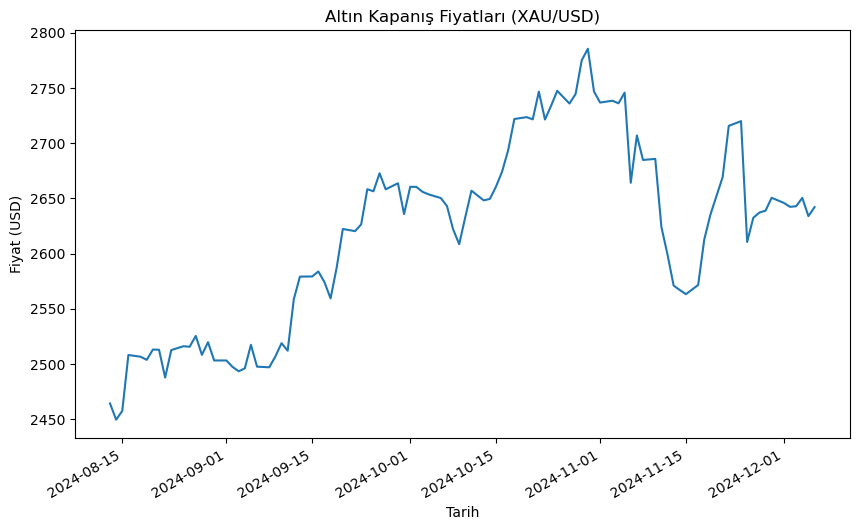

In [7]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

# API anahtarınızı buraya girin
API_KEY = 'YOUR_API_KEY'  # Örneğin: 'ZRBHQKIYIETVGULJ'

# Alpha Vantage API'sinden günlük altın fiyatlarını çekme
def get_gold_data():
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=XAUUSD&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()
    
    # Veriyi kontrol etme ve işleme
    if "Time Series (Daily)" in data:
        time_series = data["Time Series (Daily)"]
        df = pd.DataFrame(time_series).T
        df = df[['4. close']]  # Kapanış fiyatlarını seç
        df.columns = ['Close']
        df.index = pd.to_datetime(df.index)
        df = df.sort_index()
        df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
        df = df.dropna()
        return df
    else:
        raise ValueError("Veri çekilemedi.")

# Veriyi çek
gold_data = get_gold_data()

# Veriyi görselleştirme
gold_data['Close'].plot(figsize=(10, 6))
plt.title('Altın Kapanış Fiyatları (XAU/USD)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.show()

### Altın Fiyatları İçin Yapay Zeka Eğitimi

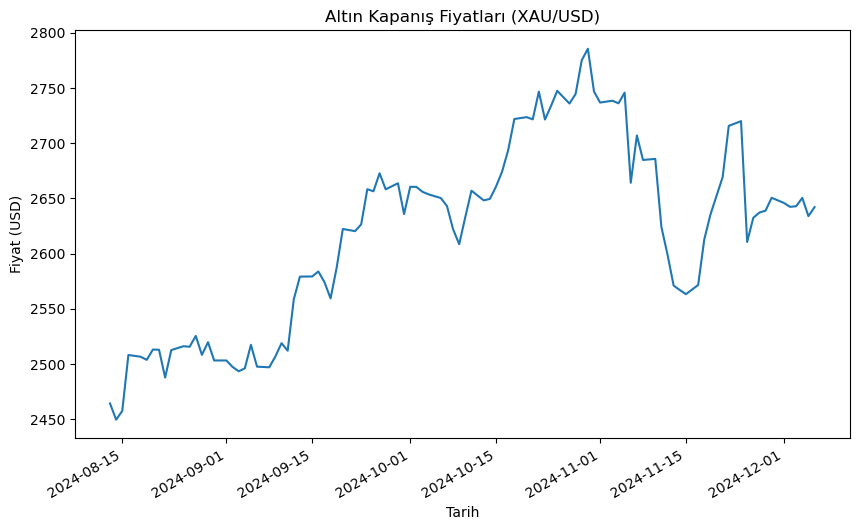

Epoch 1/50


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step - loss: 0.4786 - val_loss: 0.2292
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3586 - val_loss: 0.1637
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2864 - val_loss: 0.1064
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1936 - val_loss: 0.0577
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1315 - val_loss: 0.0206
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0806 - val_loss: 0.0013
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0465 - val_loss: 0.0074
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0622 - val_loss: 0.0302
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0859 - val_loss: 0.0390
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0905 - val_loss: 0.0333
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0880 - val_loss: 0.0214
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0671 - val_loss: 0.0105
Epoch 13/50

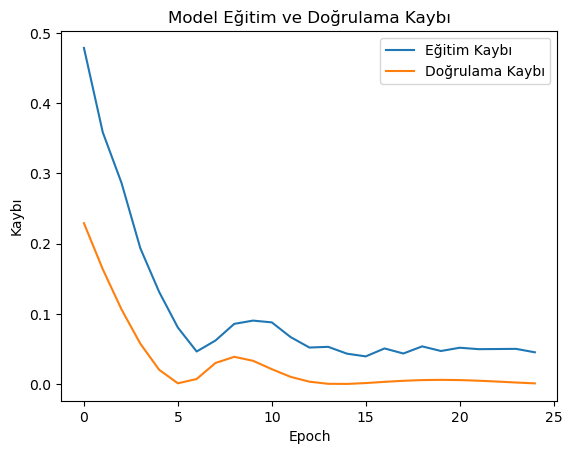

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


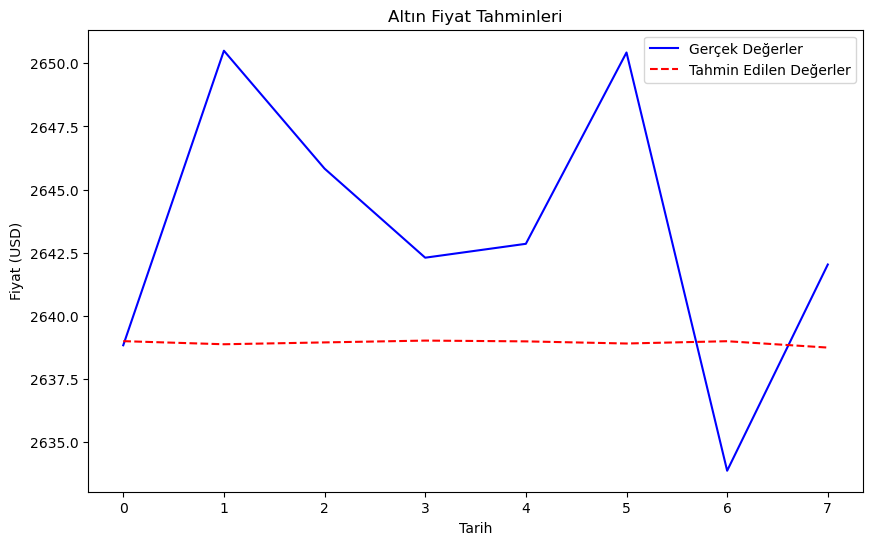

Mean Squared Error (MSE): 47.31466787316746


In [13]:
# Gerekli kütüphaneler
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# API Anahtarınızı buraya girin
API_KEY = 'ZRBHQKIYIETVGULJ'  # Verdiğiniz API anahtarı

# Altın fiyatları verisini çekmek için API'yi kullanma
def get_gold_data():
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=XAUUSD&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()
    
    # Veriyi kontrol etme ve işleme
    if "Time Series (Daily)" in data:
        time_series = data["Time Series (Daily)"]
        df = pd.DataFrame(time_series).T
        df = df[['4. close']]  # Kapanış fiyatlarını seç
        df.columns = ['Close']
        df.index = pd.to_datetime(df.index)
        df = df.sort_index()
        df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
        df = df.dropna()
        return df
    else:
        raise ValueError("Veri çekilemedi.")

# Veriyi çek
gold_data = get_gold_data()

# Veriyi görselleştirme
gold_data['Close'].plot(figsize=(10, 6))
plt.title('Altın Kapanış Fiyatları (XAU/USD)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.show()

# Veriyi ölçekleme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(gold_data[['Close']].values)

# Eğitim verisini oluşturma
look_back = 60  # Son 60 günü kullanacağız
X = []
y = []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])  # Son 60 gün
    y.append(scaled_data[i, 0])  # O anki fiyat

X = np.array(X)
y = np.array(y)

# Veriyi train ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Veriyi 3 boyutlu hale getirme (LSTM için gerekli)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM Modeli oluşturma
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout ekleyerek aşırı uyumlamayı engelle
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Tek bir çıktı

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Erken durdurma ile eğitim
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Eğitim ve doğrulama kaybını görselleştirme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

# Test seti ile tahminler
y_pred = model.predict(X_test)

# Gerçek ve tahmin edilen değerleri görselleştirme
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Gerçek değerleri orijinal skala'ya çevir
y_pred = scaler.inverse_transform(y_pred)  # Tahmin edilen değerleri orijinal skala'ya çevir

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Gerçek Değerler', color='blue')
plt.plot(y_pred, label='Tahmin Edilen Değerler', color='red', linestyle='--')
plt.title('Altın Fiyat Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()

# Modelin test sonucu değerlendirmesi
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

### Değer Yükseltme 

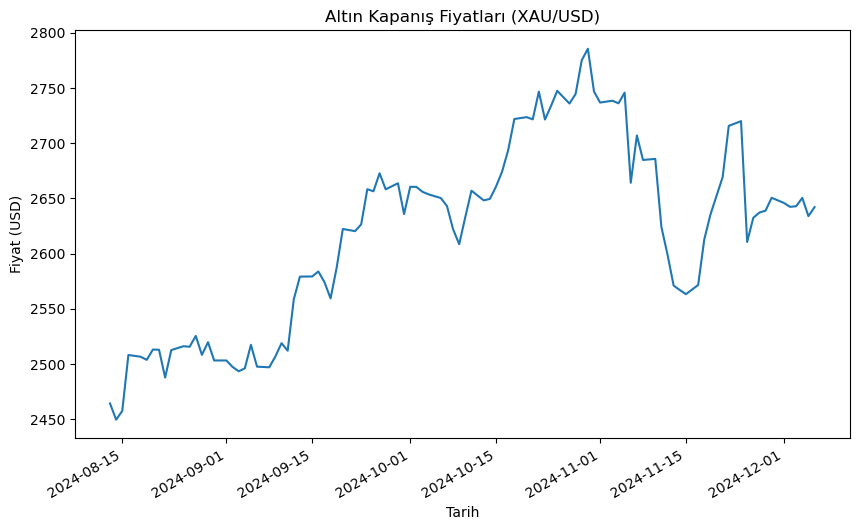

Epoch 1/100


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step - loss: 0.4520 - val_loss: 0.1660
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2928 - val_loss: 0.0454
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1262 - val_loss: 0.0164
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0649 - val_loss: 0.1079
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1577 - val_loss: 0.0311
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0931 - val_loss: 2.7052e-04
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0530 - val_loss: 0.0105
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0674 - val_loss: 0.0252
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0835 - val_loss: 0.0305
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0958 - val_loss: 0.0262
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0891 - val_loss: 0.0165
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0820 - val_loss: 0.0

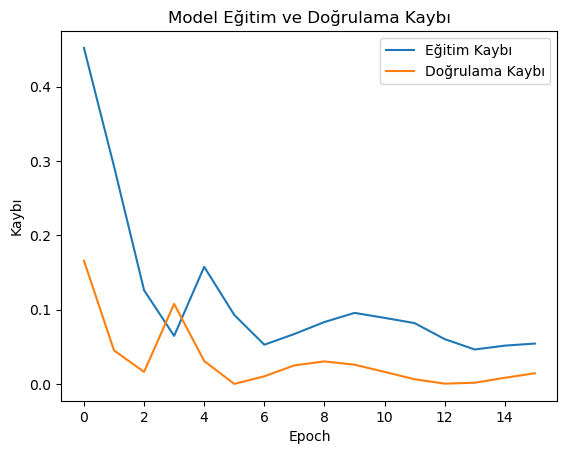

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


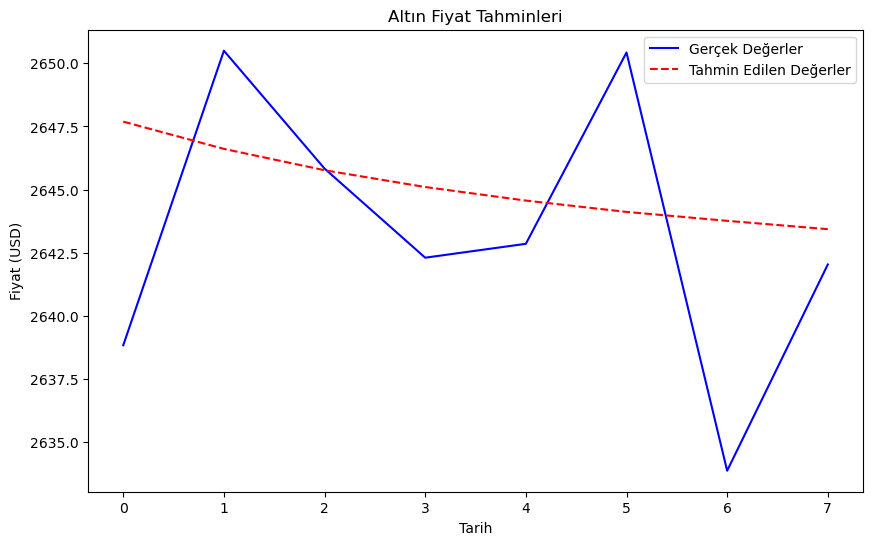

Mean Squared Error (MSE): 30.535216065132047


In [16]:
# Gerekli kütüphaneler
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# API Anahtarınızı buraya girin
API_KEY = 'ZRBHQKIYIETVGULJ'  # Verdiğiniz API anahtarı

# Altın fiyatları verisini çekmek için API'yi kullanma
def get_gold_data():
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=XAUUSD&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()
    
    # Veriyi kontrol etme ve işleme
    if "Time Series (Daily)" in data:
        time_series = data["Time Series (Daily)"]
        df = pd.DataFrame(time_series).T
        df = df[['4. close']]  # Kapanış fiyatlarını seç
        df.columns = ['Close']
        df.index = pd.to_datetime(df.index)
        df = df.sort_index()
        df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
        df = df.dropna()
        return df
    else:
        raise ValueError("Veri çekilemedi.")

# Veriyi çek
gold_data = get_gold_data()

# Veriyi görselleştirme
gold_data['Close'].plot(figsize=(10, 6))
plt.title('Altın Kapanış Fiyatları (XAU/USD)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.show()

# Veriyi ölçekleme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(gold_data[['Close']].values)

# Eğitim verisini oluşturma
look_back = 60  # Son 60 günü kullanacağız
X = []
y = []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])  # Son 60 gün
    y.append(scaled_data[i, 0])  # O anki fiyat

X = np.array(X)
y = np.array(y)

# Veriyi train ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Veriyi 3 boyutlu hale getirme (LSTM için gerekli)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM Modeli oluşturma
model = Sequential()

# İlk LSTM katmanı (50 nöron ve return_sequences=True ile çıktıyı diğer katmana iletmek)
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# İkinci LSTM katmanı
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Üçüncü LSTM katmanı
model.add(LSTM(units=100))
model.add(Dropout(0.2))

# Çıktı katmanı
model.add(Dense(units=1))  # Tek bir çıktı

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Erken durdurma ile eğitim
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme (epoch sayısını artırdık)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Eğitim ve doğrulama kaybını görselleştirme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

# Test seti ile tahminler
y_pred = model.predict(X_test)

# Gerçek ve tahmin edilen değerleri görselleştirme
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Gerçek değerleri orijinal skala'ya çevir
y_pred = scaler.inverse_transform(y_pred)  # Tahmin edilen değerleri orijinal skala'ya çevir

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Gerçek Değerler', color='blue')
plt.plot(y_pred, label='Tahmin Edilen Değerler', color='red', linestyle='--')
plt.title('Altın Fiyat Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()

# Modelin test sonucu değerlendirmesi
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

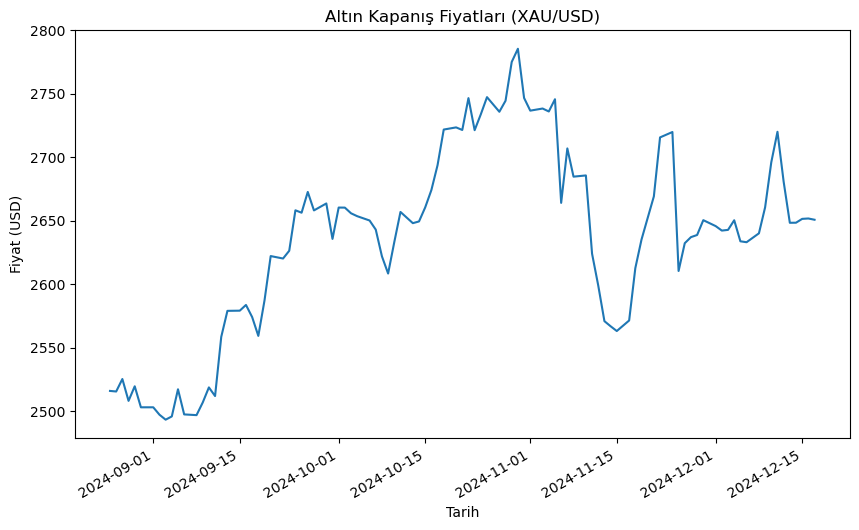

Epoch 1/50


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - loss: 0.2467 - val_loss: 0.2371
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1814 - val_loss: 0.1774
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1320 - val_loss: 0.1213
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0903 - val_loss: 0.0708
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0495 - val_loss: 0.0313
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0415 - val_loss: 0.0114
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0492 - val_loss: 0.0098
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0521 - val_loss: 0.0099
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0582 - val_loss: 0.0102
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0542 - val_loss: 0.0131
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - val_loss: 0.0193
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0329 - val_loss: 0.0276
Epoch 13/50

/var/folders/v0/ksj7h62x33q6rmnxkxpzsqfr0000gn/T/ipykernel_2998/1858739580.py:105: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_60_days[0, -1, 0] = prediction


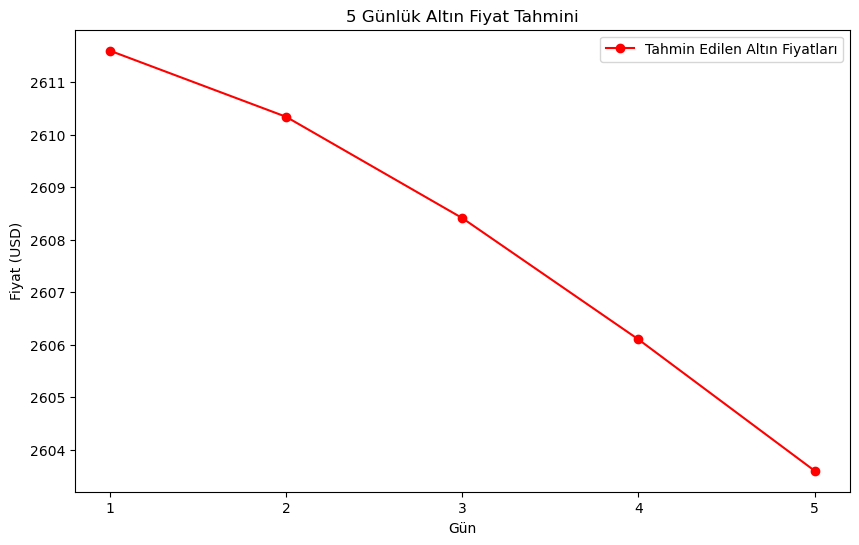

5 Günlük Altın Fiyat Tahminleri:
Gün 1: 2611.60 USD
Gün 2: 2610.34 USD
Gün 3: 2608.41 USD
Gün 4: 2606.10 USD
Gün 5: 2603.60 USD


In [16]:
# Gerekli kütüphaneler
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# API Anahtarınızı buraya girin
API_KEY = 'ZRBHQKIYIETVGULJ'  # Verdiğiniz API anahtarı

# Altın fiyatları verisini çekmek için API'yi kullanma
def get_gold_data():
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=XAUUSD&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()
    
    # Veriyi kontrol etme ve işleme
    if "Time Series (Daily)" in data:
        time_series = data["Time Series (Daily)"]
        df = pd.DataFrame(time_series).T
        df = df[['4. close']]  # Kapanış fiyatlarını seç
        df.columns = ['Close']
        df.index = pd.to_datetime(df.index)
        df = df.sort_index()
        df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
        df = df.dropna()
        return df
    else:
        raise ValueError("Veri çekilemedi.")

# Veriyi çek
gold_data = get_gold_data()

# Veriyi görselleştirme
gold_data['Close'].plot(figsize=(10, 6))
plt.title('Altın Kapanış Fiyatları (XAU/USD)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.show()

# Veriyi ölçekleme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(gold_data[['Close']].values)

# Son 60 günü kullanarak veri hazırlığı
look_back = 60
X = []
y = []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i - look_back:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Veriyi yeniden şekillendirme
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM Modeli Oluşturma
model = Sequential()

# LSTM katmanları ve Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Çıktı katmanı
model.add(Dense(units=1))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Erken durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Modeli eğitme
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Son 60 günü kullanarak 5 günlük tahmin yapma
last_60_days = scaled_data[-look_back:]  # Son 60 gün
last_60_days = np.reshape(last_60_days, (1, look_back, 1))

# 5 günlük tahmin
predicted_prices = []
for i in range(5):
    prediction = model.predict(last_60_days)
    predicted_prices.append(prediction[0][0])

    # Tahmin edilen fiyatı ekle ve bir sonraki tahmin için veriyi güncelle
    # last_60_days, 3 boyutlu dizidir, prediciton ise 2 boyutlu bir dizidir
    # prediction[0][0] değeri, 3. boyutun değeridir
    
    # last_60_days'ı güncelleme işlemi
    last_60_days = np.roll(last_60_days, shift=-1, axis=1)
    last_60_days[0, -1, 0] = prediction

# Tahmin edilen fiyatları orijinal skala'ya dönüştürme
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Tahmin edilen fiyatları görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), predicted_prices, label='Tahmin Edilen Altın Fiyatları', color='red', marker='o')
plt.title('5 Günlük Altın Fiyat Tahmini')
plt.xlabel('Gün')
plt.ylabel('Fiyat (USD)')
plt.xticks(np.arange(1, 6))
plt.legend()
plt.show()

# Tahmin edilen verileri yazdırma
print("5 Günlük Altın Fiyat Tahminleri:")
for i, price in enumerate(predicted_prices):
    print(f"Gün {i+1}: {price[0]:.2f} USD")